In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout



In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
array_shape_Train = (6000, 28, 28)
array_shape_Test = (1000, 28, 28)

# Create the array with random values between 0 and 255
#in accordance with data given from keras
char_Class_TrainX = np.random.randint(0, 256, size=array_shape_Train, dtype=np.uint8)
char_Class_TrainY = np.full(array_shape_Train[0], 10)

char_Class_TestX = np.random.randint(0, 256, size=array_shape_Test, dtype=np.uint8)
char_Class_TestY = np.full(array_shape_Test[0], 10)



trainX_Final = np.concatenate((trainX, char_Class_TrainX), axis=0)
trainY_Final = np.concatenate((trainy, char_Class_TrainY), axis=0)
testX_Final = np.concatenate((testX, char_Class_TestX), axis=0)
testY_Final = np.concatenate((testy, char_Class_TestY), axis=0)

print(len(trainX_Final))
print(len(trainY_Final))
print(len(testX_Final))
print(len(testY_Final))

from sklearn.utils import shuffle
trainX_Final, trainY_Final = shuffle(trainX_Final, trainY_Final, random_state=0)
testX_Final, testY_Final = shuffle(testX_Final, testY_Final, random_state=0)

print(trainY_Final[0])

X_train = trainX_Final
X_test = testX_Final
y_train =  trainY_Final
y_test = testY_Final


66000
66000
11000
11000
4


In [ ]:
def plot_input_img(i):
    plt.imshow(trainX_Final[i], cmap= 'gray')
    plt.title(trainY_Final[i])
    plt.show()

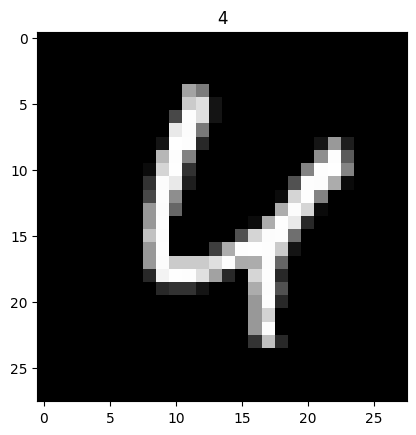

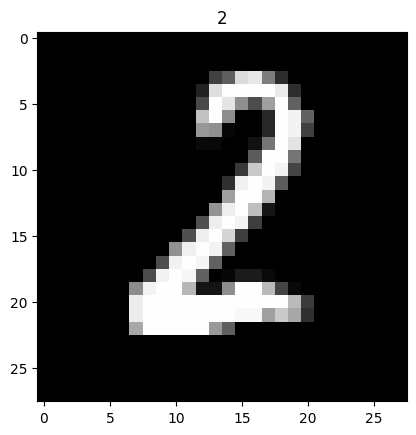

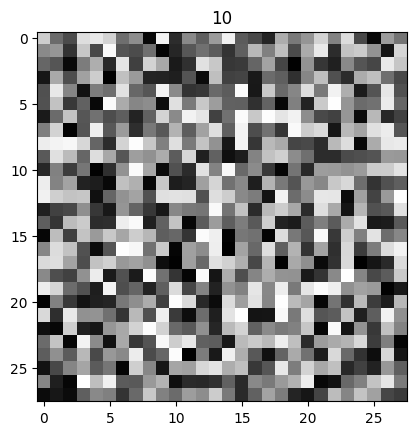

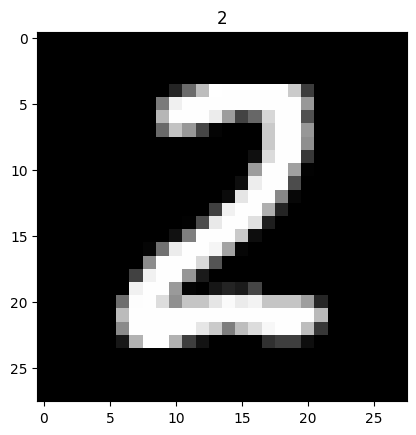

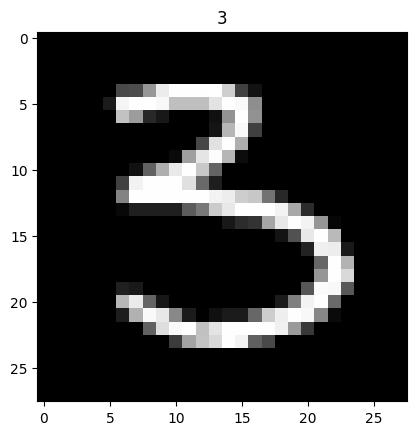

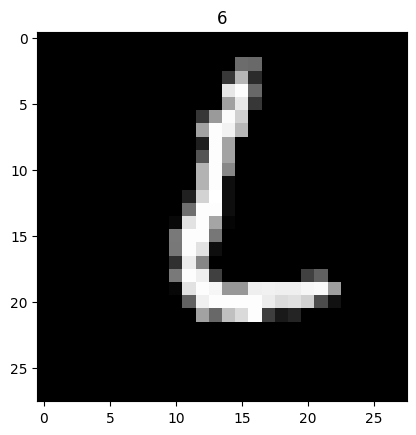

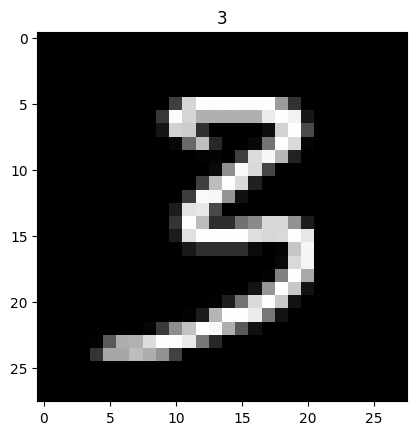

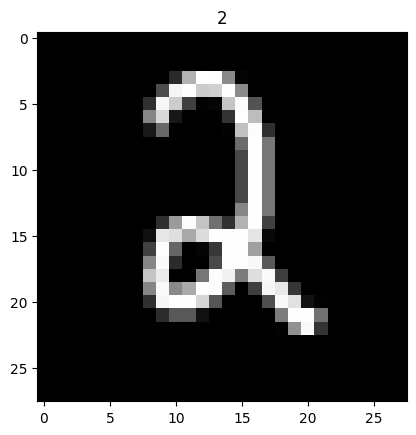

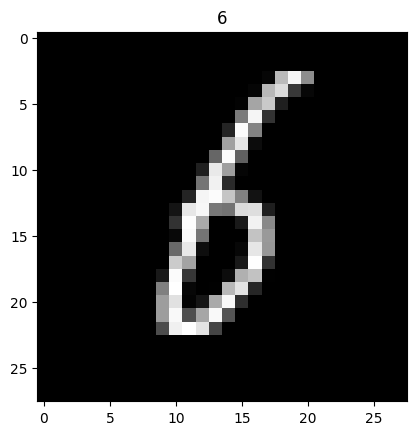

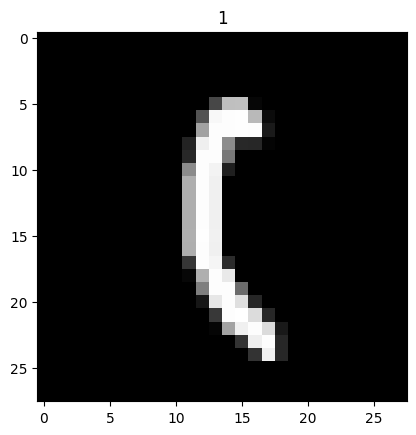

In [ ]:
for i in range(10):
  plot_input_img(i)

In [ ]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
#convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))  # Added Dense layer with 64 units and ReLU activation
model.add(Dropout(0.1))  # Added 10% dropout

model.add(Dense(11, activation='sigmoid'))  # Final Dense layer with sigmoid activation





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.CosineSimilarity(axis=1), metrics=['accuracy'] )

In [ ]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor='val_acc', min_delta= 0.01, patience= 4, verbose= 1)

# Model Check Point

mc = ModelCheckpoint("./bestmodel.h5", monitor= 'val_acc', verbose= 1, save_best_only= True)

cb=[es,mc]



Model Training


In [ ]:
his = model.fit(X_train, y_train, epochs = 25,validation_split=0.2, callbacks = cb)


Epoch 1/25
1642/1650 [============================>.] - ETA: 0s - loss: -0.5262 - accuracy: 0.5145

1650/1650 [==============================] - 13s 5ms/step - loss: -0.5277 - accuracy: 0.5160 - val_loss: -0.8816 - val_accuracy: 0.8810
Epoch 2/25
1646/1650 [============================>.] - ETA: 0s - loss: -0.8883 - accuracy: 0.8788

1650/1650 [==============================] - 6s 4ms/step - loss: -0.8885 - accuracy: 0.8789 - val_loss: -0.9289 - val_accuracy: 0.9214
Epoch 3/25
1640/1650 [============================>.] - ETA: 0s - loss: -0.9262 - accuracy: 0.9184

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9263 - accuracy: 0.9185 - val_loss: -0.9473 - val_accuracy: 0.9432
Epoch 4/25
1643/1650 [============================>.] - ETA: 0s - loss: -0.9421 - accuracy: 0.9366

1650/1650 [==============================] - 6s 4ms/step - loss: -0.9421 - accuracy: 0.9366 - val_loss: -0.9554 - val_accuracy: 0.9513
Epoch 5/25
1639/1650 [============================>.] - ETA: 0s - loss: -0.9512 - accuracy: 0.9467

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9511 - accuracy: 0.9466 - val_loss: -0.9602 - val_accuracy: 0.9571
Epoch 6/25
1642/1650 [============================>.] - ETA: 0s - loss: -0.9567 - accuracy: 0.9528

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9567 - accuracy: 0.9527 - val_loss: -0.9634 - val_accuracy: 0.9578
Epoch 7/25
1641/1650 [============================>.] - ETA: 0s - loss: -0.9613 - accuracy: 0.9576

1650/1650 [==============================] - 9s 5ms/step - loss: -0.9614 - accuracy: 0.9577 - val_loss: -0.9665 - val_accuracy: 0.9617
Epoch 8/25
1647/1650 [============================>.] - ETA: 0s - loss: -0.9639 - accuracy: 0.9603

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9639 - accuracy: 0.9602 - val_loss: -0.9718 - val_accuracy: 0.9690
Epoch 9/25
1638/1650 [============================>.] - ETA: 0s - loss: -0.9671 - accuracy: 0.9643

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9672 - accuracy: 0.9645 - val_loss: -0.9731 - val_accuracy: 0.9692
Epoch 10/25
1643/1650 [============================>.] - ETA: 0s - loss: -0.9696 - accuracy: 0.9666

1650/1650 [==============================] - 6s 4ms/step - loss: -0.9696 - accuracy: 0.9667 - val_loss: -0.9742 - val_accuracy: 0.9717
Epoch 11/25
1645/1650 [============================>.] - ETA: 0s - loss: -0.9709 - accuracy: 0.9682

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9709 - accuracy: 0.9682 - val_loss: -0.9737 - val_accuracy: 0.9699
Epoch 12/25
1645/1650 [============================>.] - ETA: 0s - loss: -0.9724 - accuracy: 0.9700

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9724 - accuracy: 0.9700 - val_loss: -0.9763 - val_accuracy: 0.9730
Epoch 13/25
1644/1650 [============================>.] - ETA: 0s - loss: -0.9739 - accuracy: 0.9710

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9739 - accuracy: 0.9710 - val_loss: -0.9774 - val_accuracy: 0.9757
Epoch 14/25
1650/1650 [==============================] - ETA: 0s - loss: -0.9756 - accuracy: 0.9737

1650/1650 [==============================] - 6s 4ms/step - loss: -0.9756 - accuracy: 0.9737 - val_loss: -0.9791 - val_accuracy: 0.9767
Epoch 15/25
1643/1650 [============================>.] - ETA: 0s - loss: -0.9762 - accuracy: 0.9732

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9762 - accuracy: 0.9733 - val_loss: -0.9811 - val_accuracy: 0.9790
Epoch 16/25
1648/1650 [============================>.] - ETA: 0s - loss: -0.9773 - accuracy: 0.9748

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9773 - accuracy: 0.9748 - val_loss: -0.9808 - val_accuracy: 0.9775
Epoch 17/25
1648/1650 [============================>.] - ETA: 0s - loss: -0.9788 - accuracy: 0.9771

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9788 - accuracy: 0.9771 - val_loss: -0.9823 - val_accuracy: 0.9798
Epoch 18/25
1636/1650 [============================>.] - ETA: 0s - loss: -0.9792 - accuracy: 0.9772

1650/1650 [==============================] - 10s 6ms/step - loss: -0.9793 - accuracy: 0.9772 - val_loss: -0.9825 - val_accuracy: 0.9796
Epoch 19/25
1647/1650 [============================>.] - ETA: 0s - loss: -0.9799 - accuracy: 0.9781

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9799 - accuracy: 0.9781 - val_loss: -0.9827 - val_accuracy: 0.9808
Epoch 20/25
1636/1650 [============================>.] - ETA: 0s - loss: -0.9806 - accuracy: 0.9783

1650/1650 [==============================] - 7s 4ms/step - loss: -0.9806 - accuracy: 0.9784 - val_loss: -0.9833 - val_accuracy: 0.9811
Epoch 21/25
1650/1650 [==============================] - ETA: 0s - loss: -0.9813 - accuracy: 0.9799

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9813 - accuracy: 0.9799 - val_loss: -0.9834 - val_accuracy: 0.9813
Epoch 22/25
1646/1650 [============================>.] - ETA: 0s - loss: -0.9818 - accuracy: 0.9804

1650/1650 [==============================] - 6s 4ms/step - loss: -0.9818 - accuracy: 0.9804 - val_loss: -0.9844 - val_accuracy: 0.9828
Epoch 23/25
1640/1650 [============================>.] - ETA: 0s - loss: -0.9826 - accuracy: 0.9808

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9826 - accuracy: 0.9808 - val_loss: -0.9846 - val_accuracy: 0.9833
Epoch 24/25
1636/1650 [============================>.] - ETA: 0s - loss: -0.9831 - accuracy: 0.9815

1650/1650 [==============================] - 6s 4ms/step - loss: -0.9830 - accuracy: 0.9815 - val_loss: -0.9851 - val_accuracy: 0.9839
Epoch 25/25
1644/1650 [============================>.] - ETA: 0s - loss: -0.9837 - accuracy: 0.9823

1650/1650 [==============================] - 8s 5ms/step - loss: -0.9836 - accuracy: 0.9822 - val_loss: -0.9841 - val_accuracy: 0.9814


In [ ]:
model.save('final_Model_CNN.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_S = keras.models.load_model('final_Model_CNN.h5')

In [ ]:
score = model_S.evaluate(X_test, y_test )

print(f" the model accuracy is {score[1]} ")

344/344 [==============================] - 1s 3ms/step - loss: -0.9853 - accuracy: 0.9825
 the model accuracy is 0.9825454354286194 


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


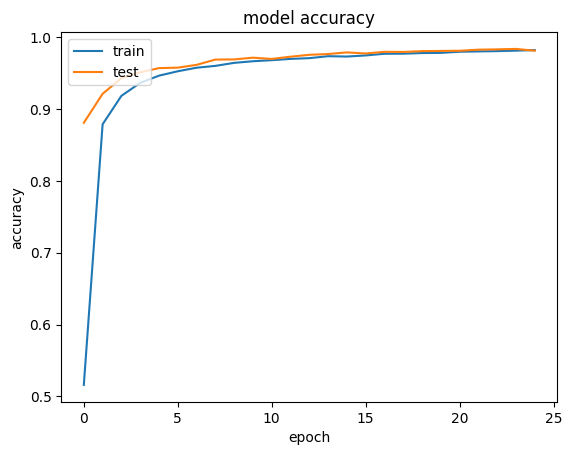

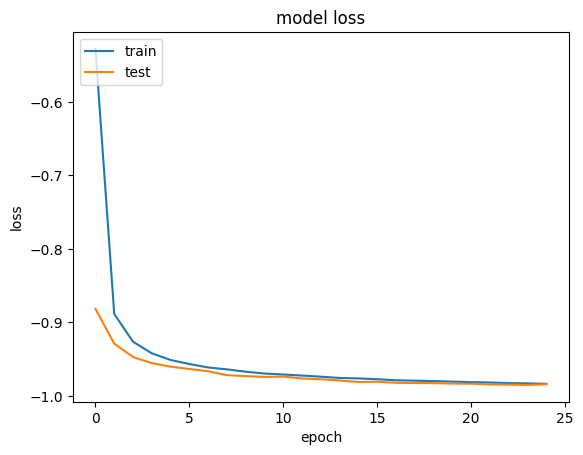

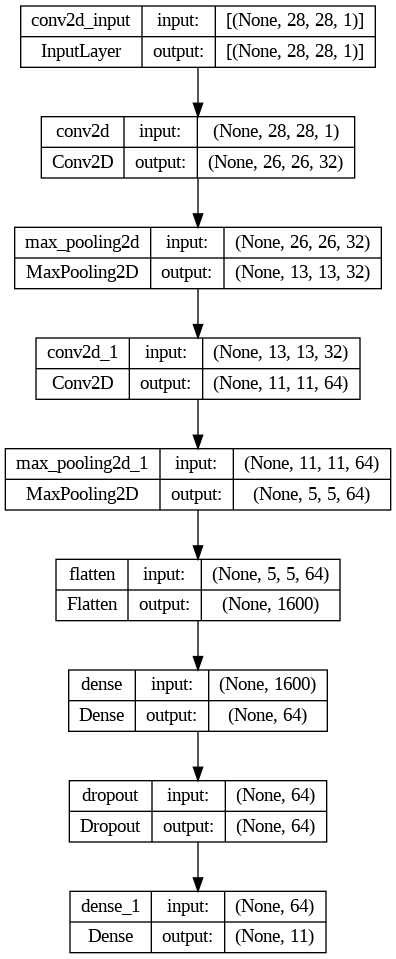

In [ ]:
print(his.history.keys())
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

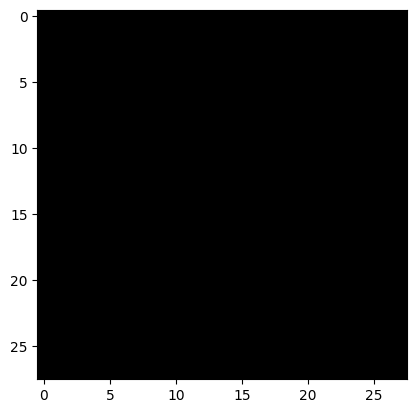

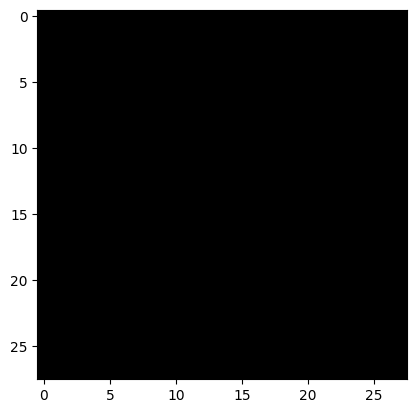

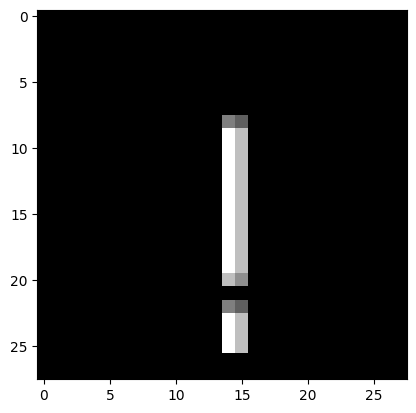

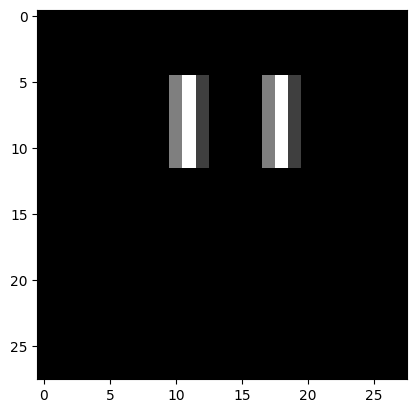

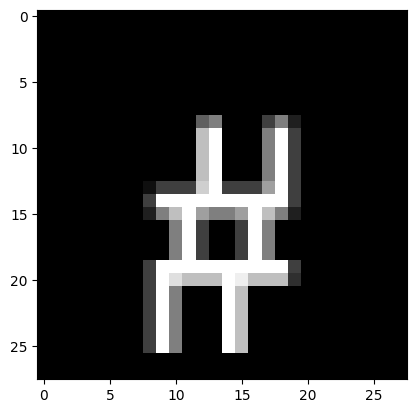

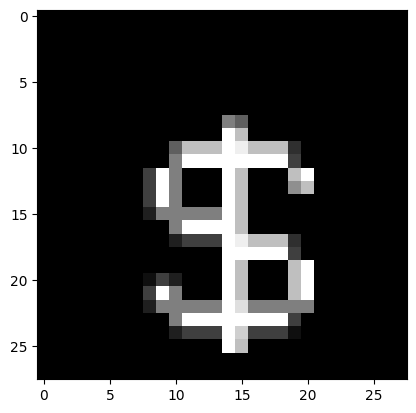

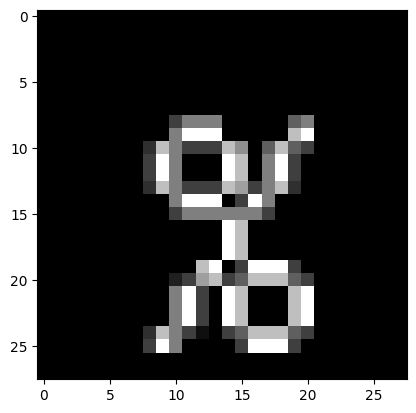

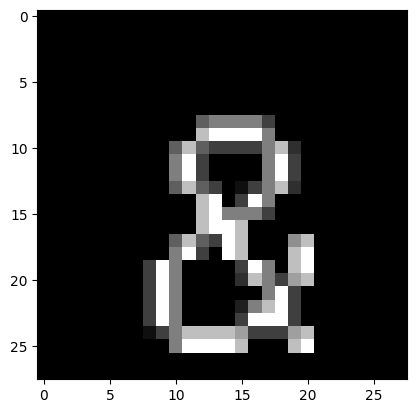

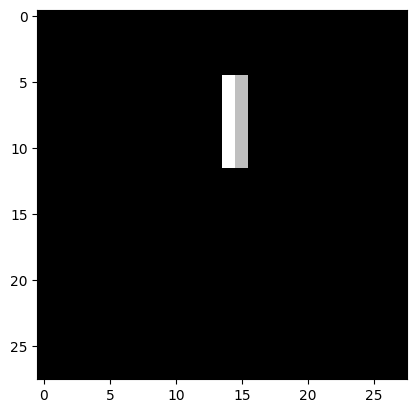

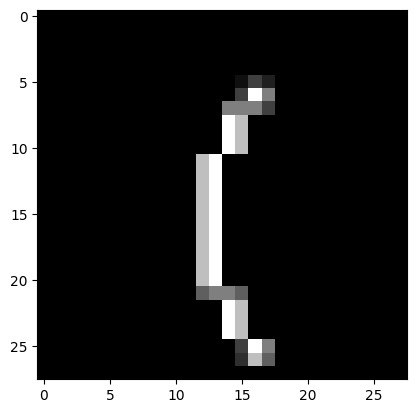

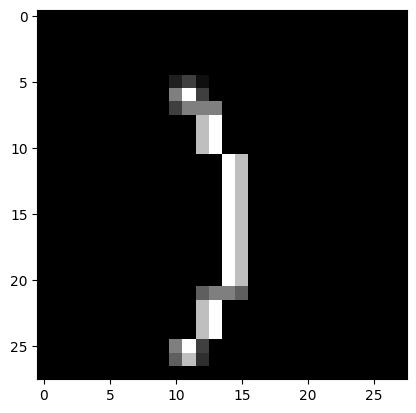

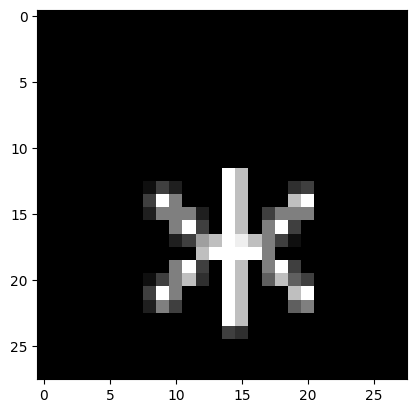

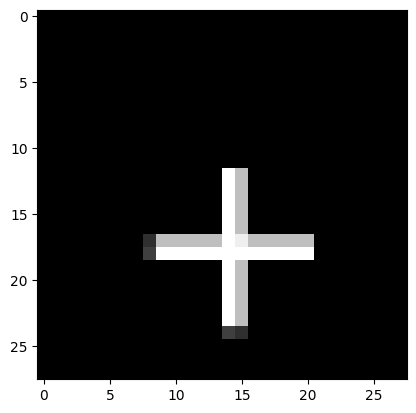

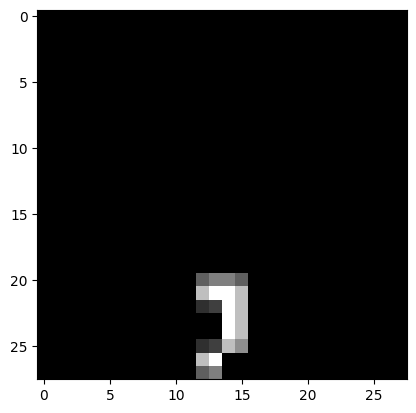

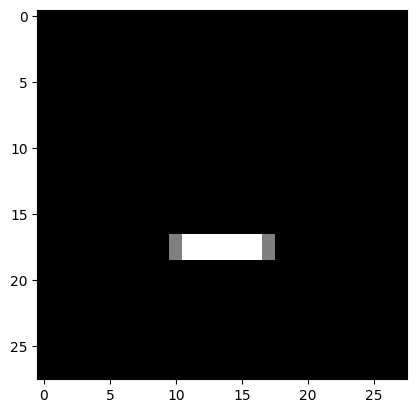

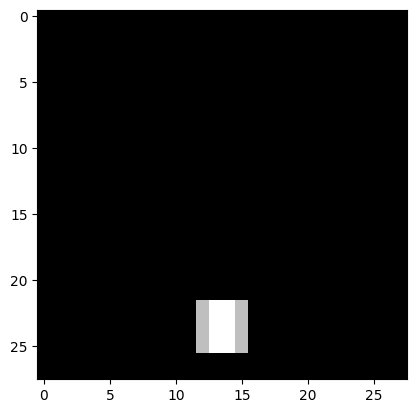

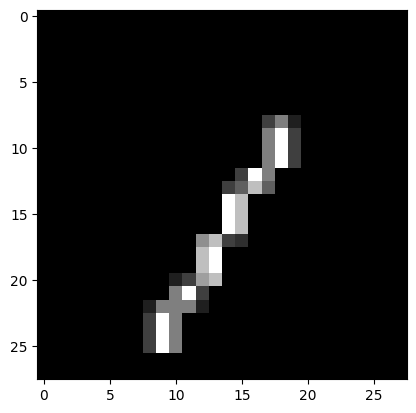

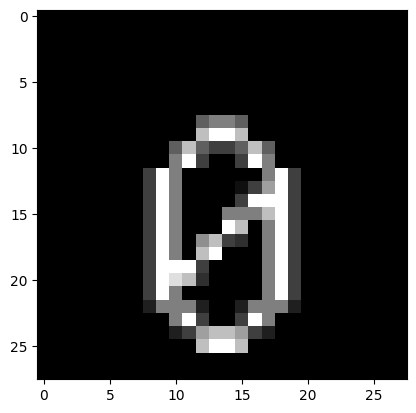

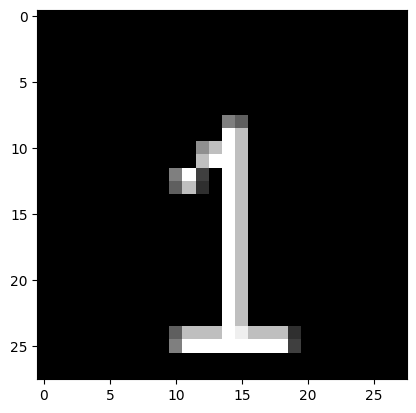

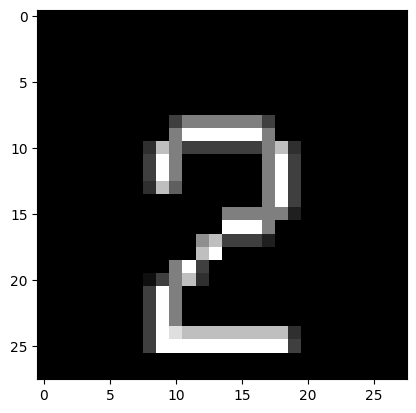

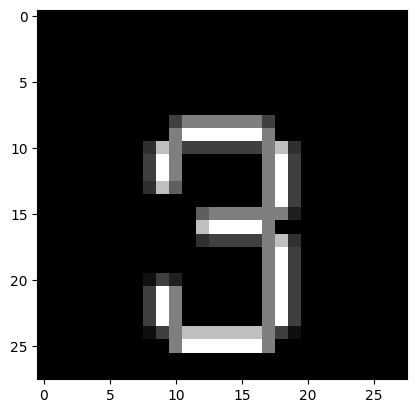

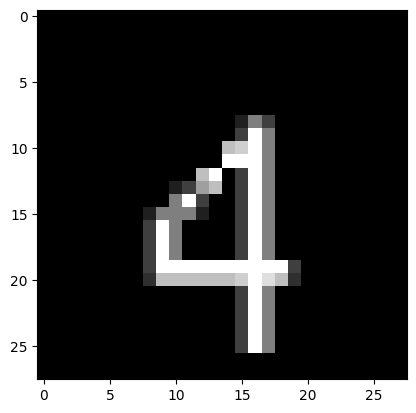

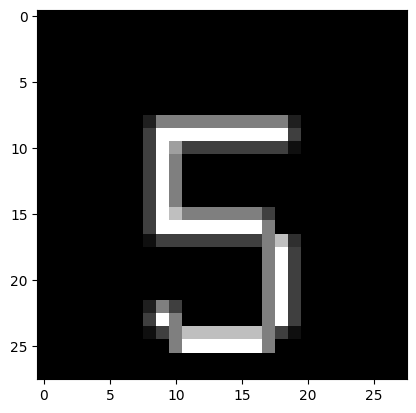

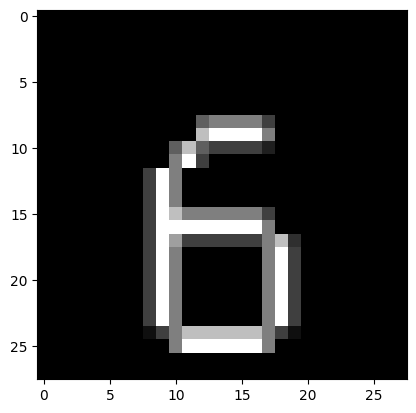

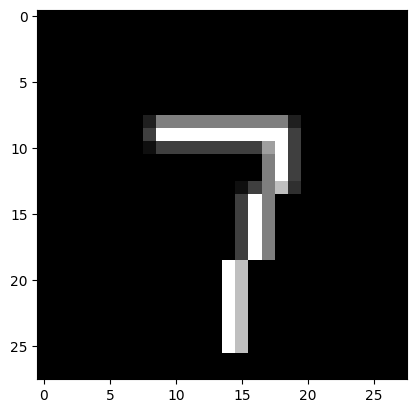

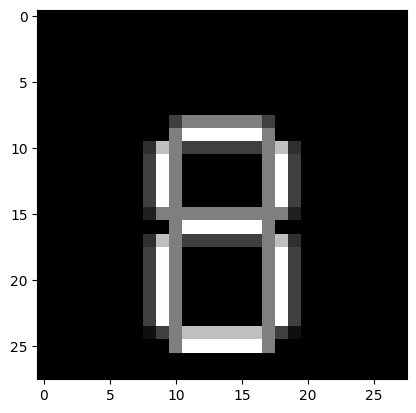

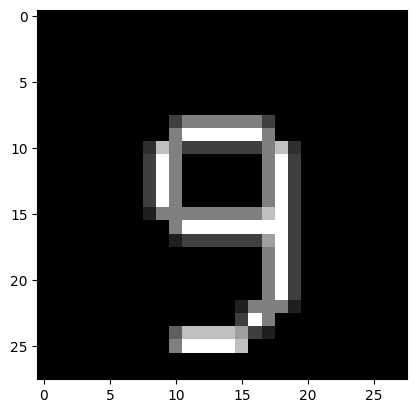

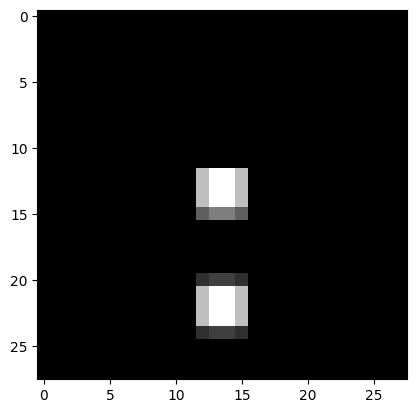

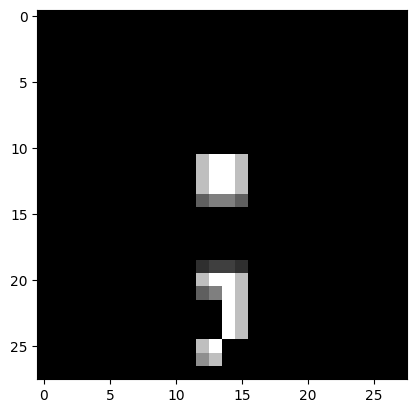

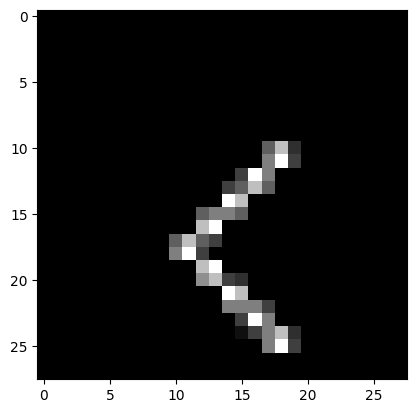

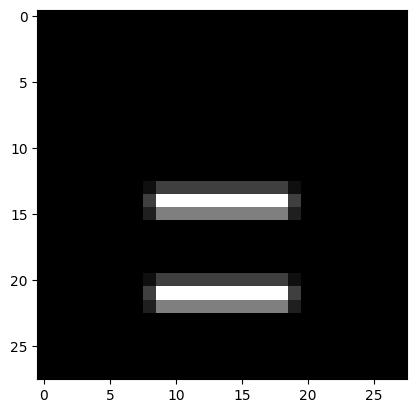

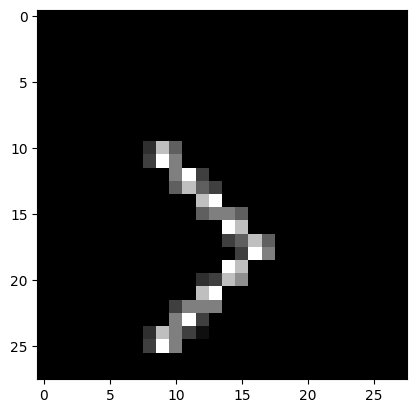

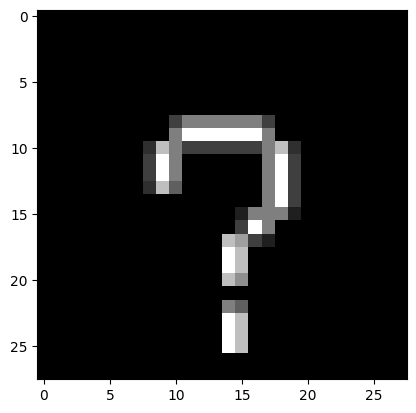

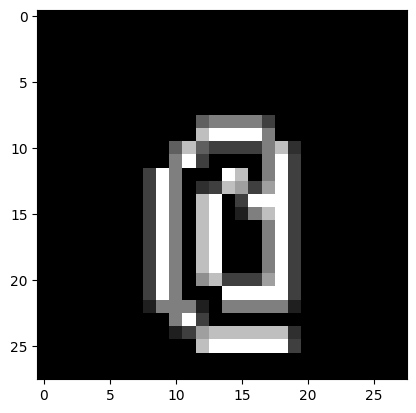

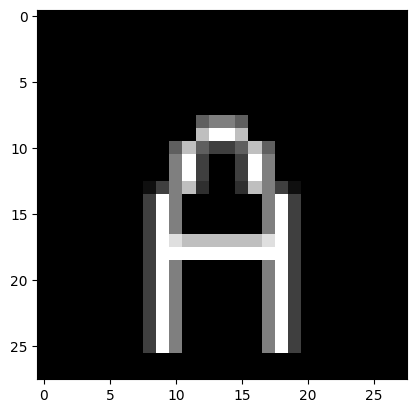

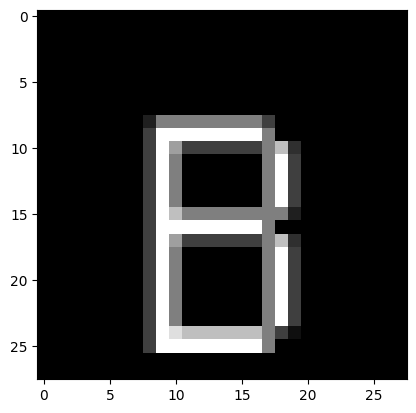

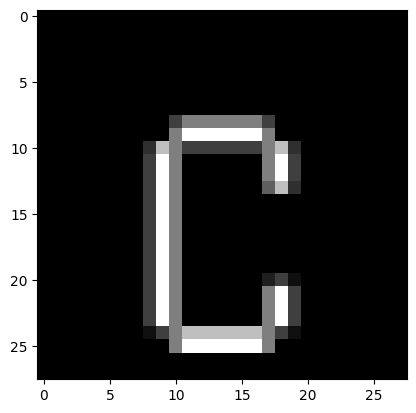

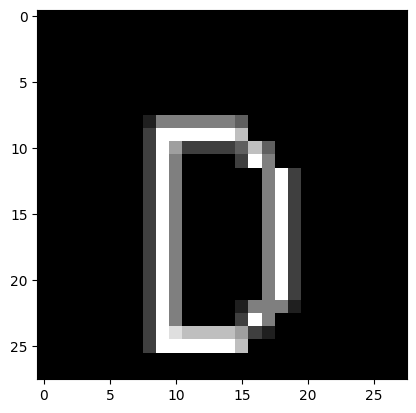

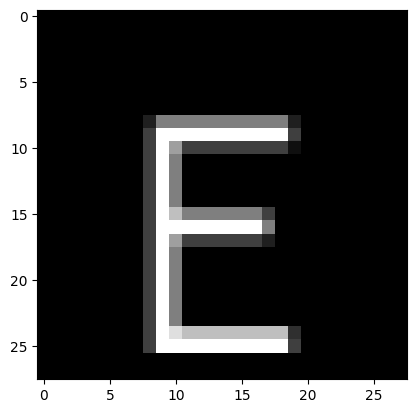

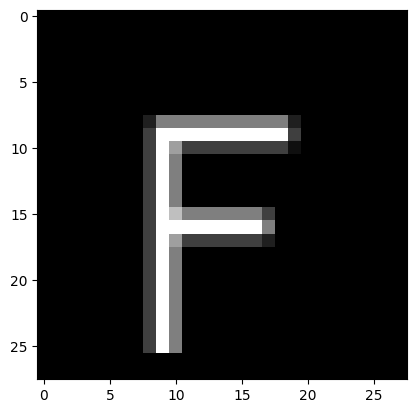

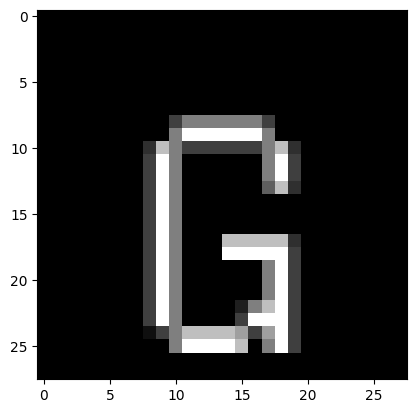

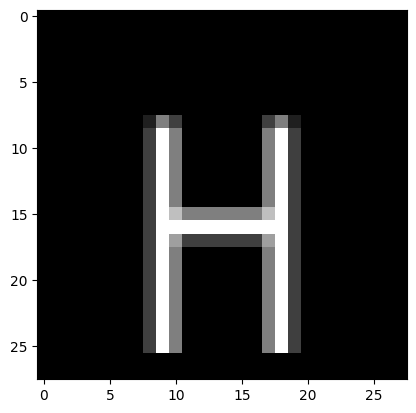

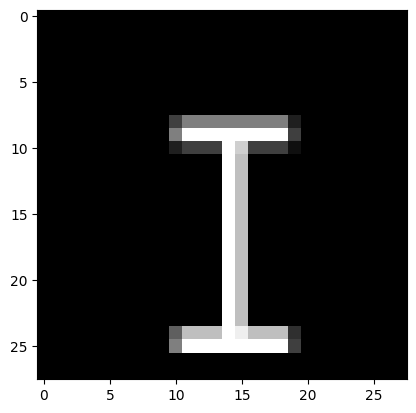

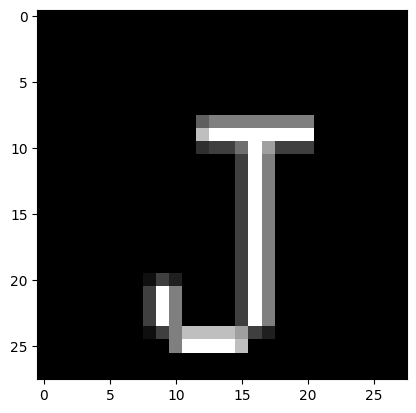

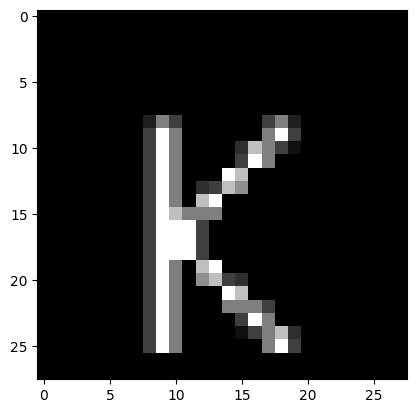

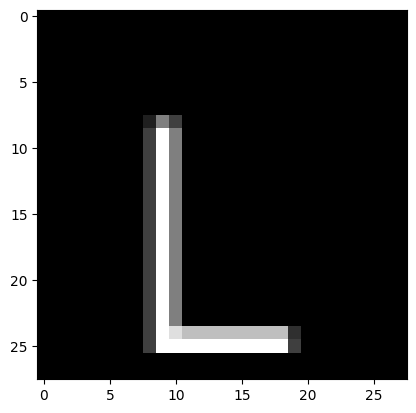

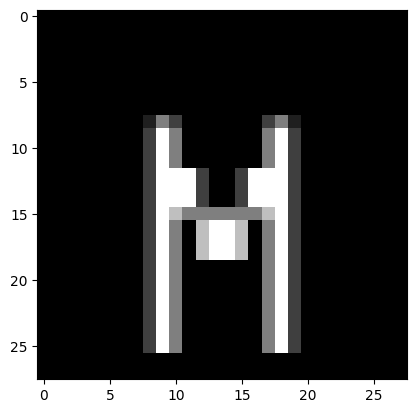

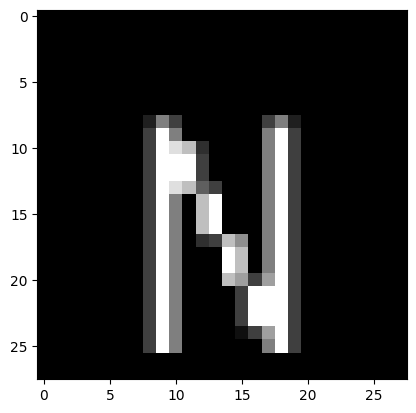

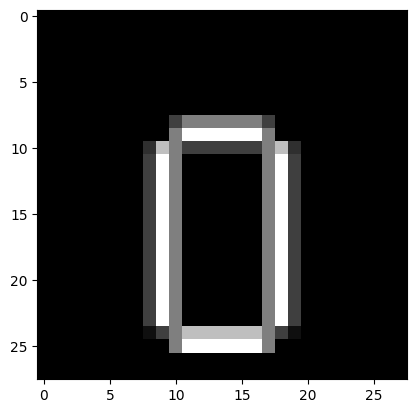

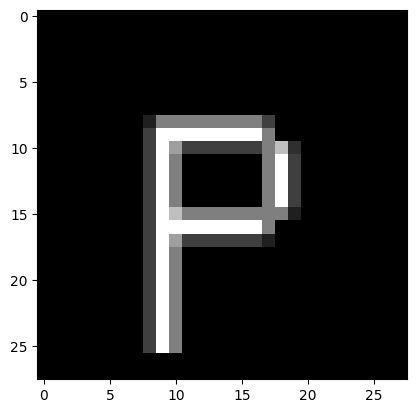

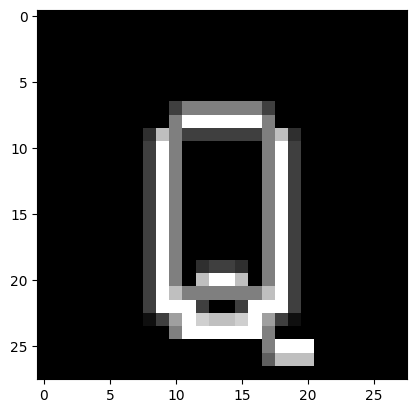

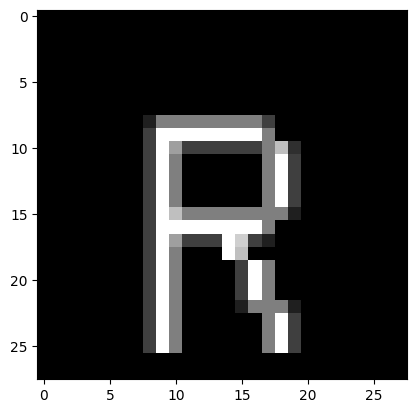

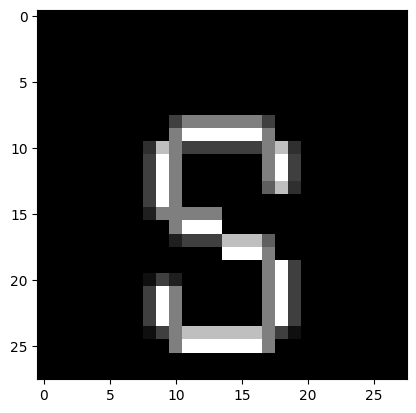

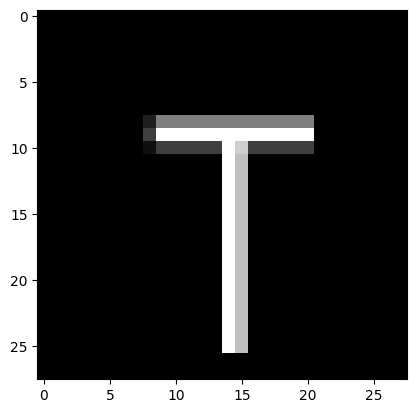

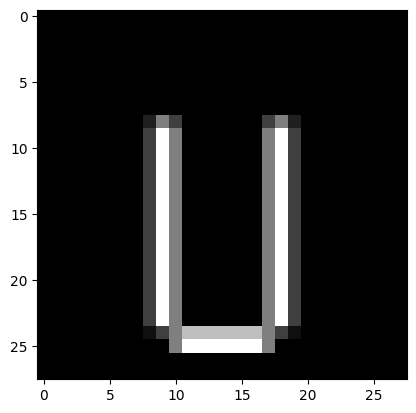

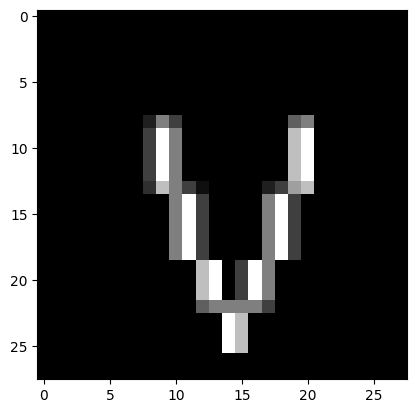

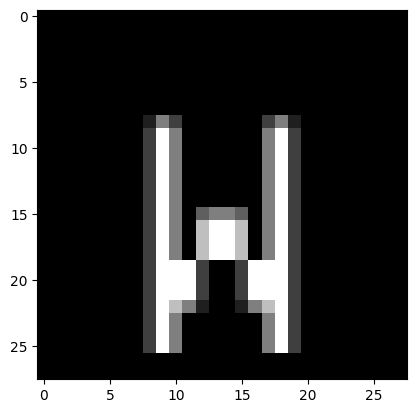

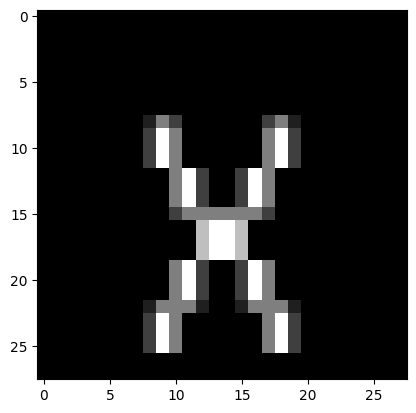

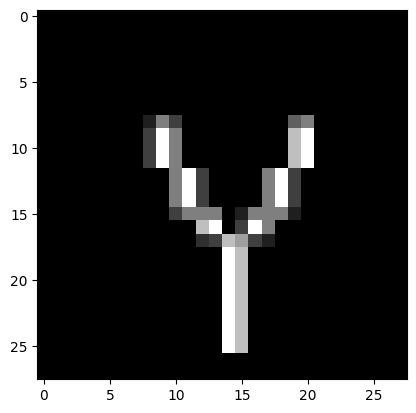

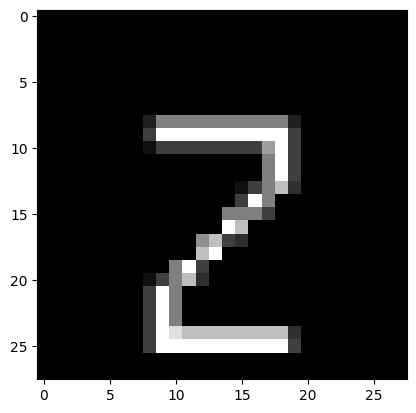

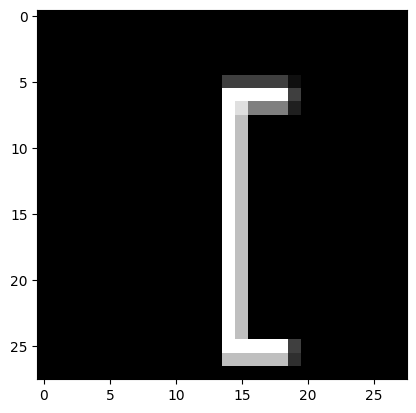

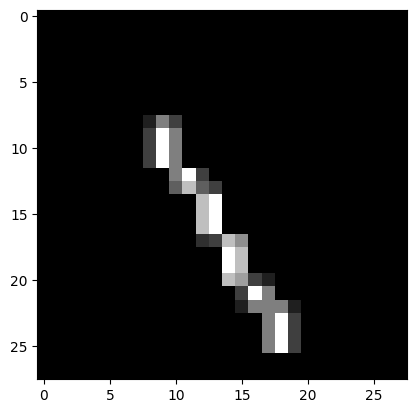

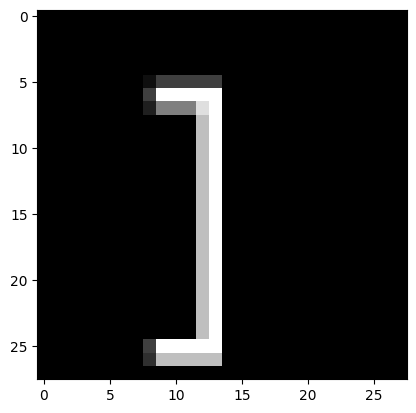

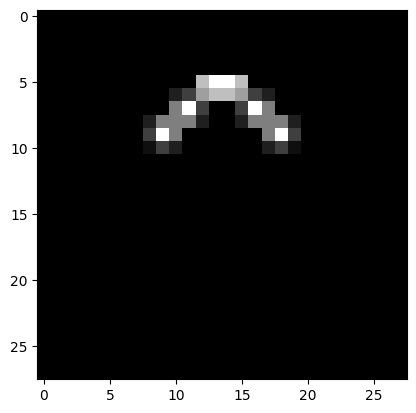

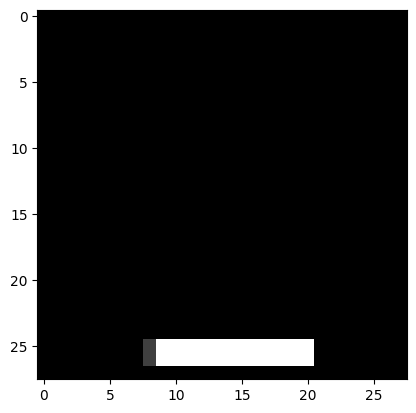

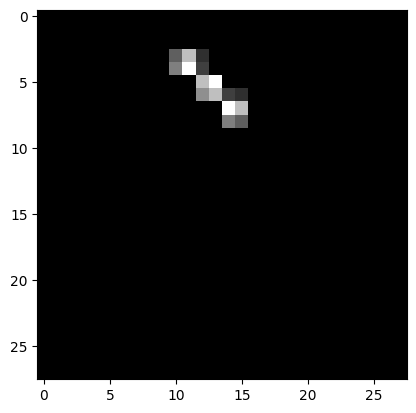

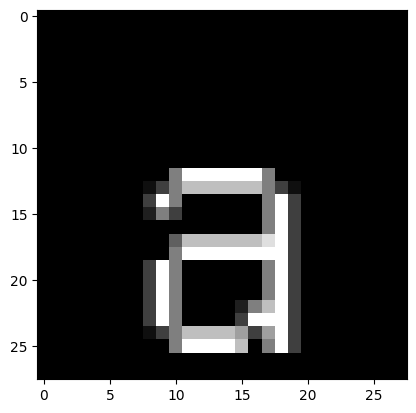

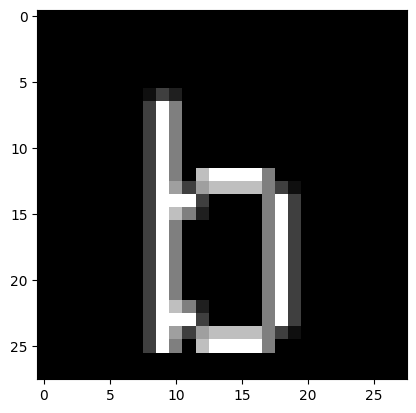

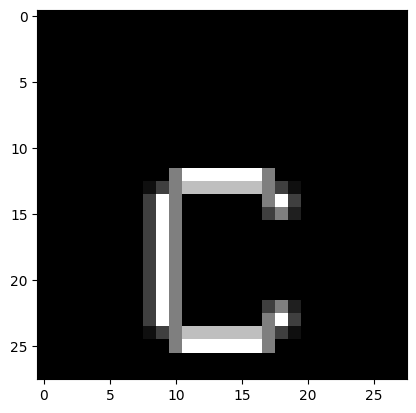

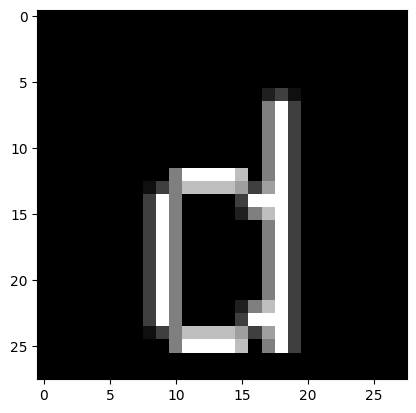

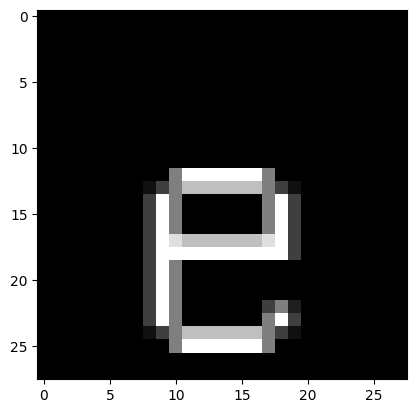

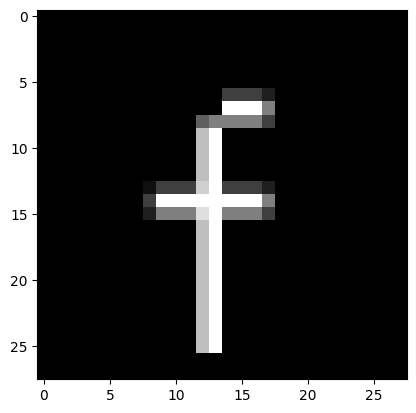

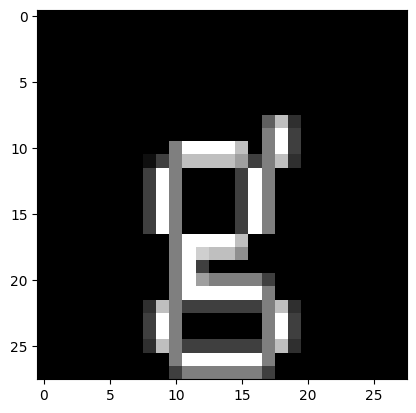

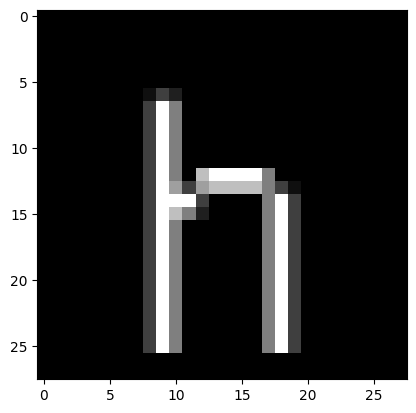

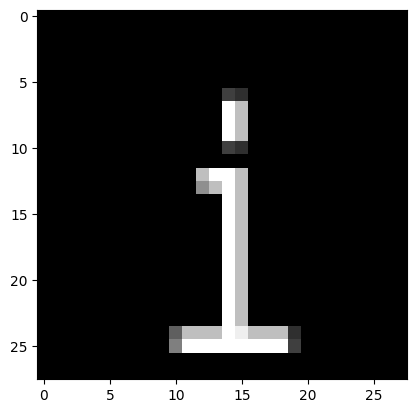

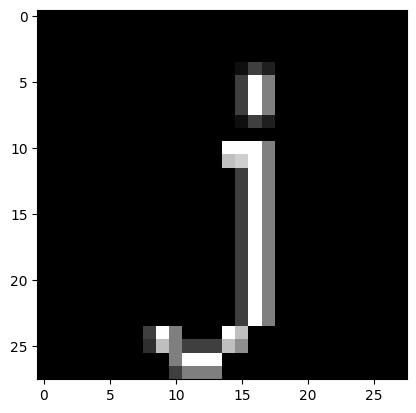

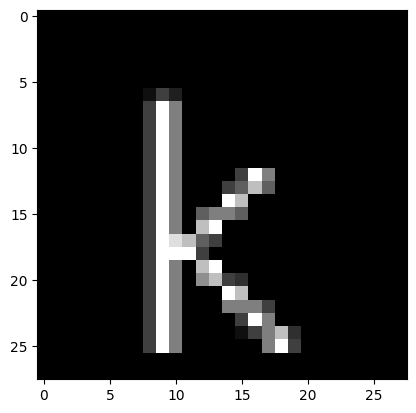

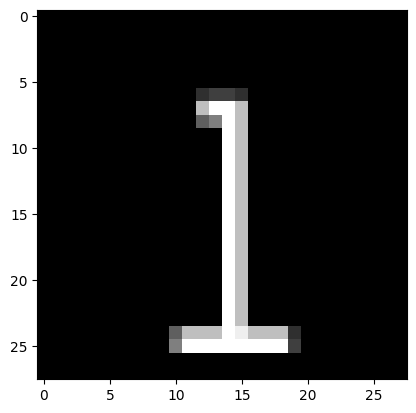

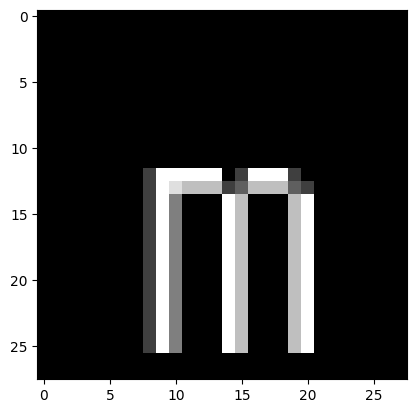

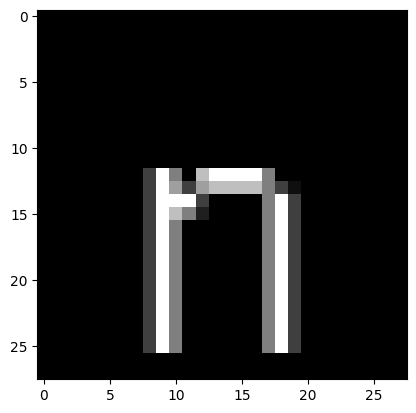

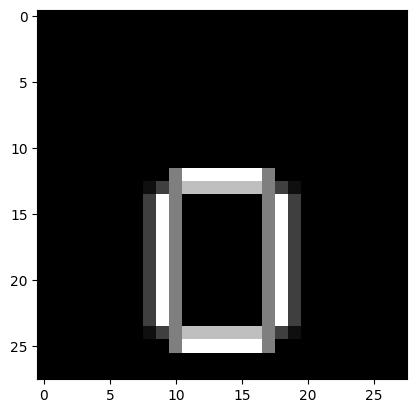

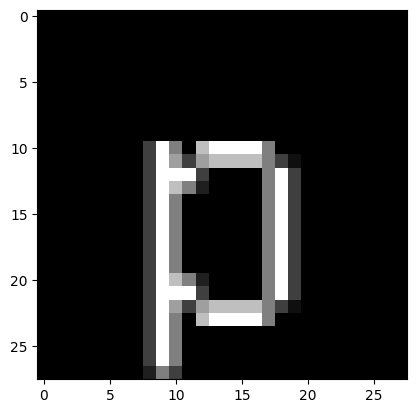

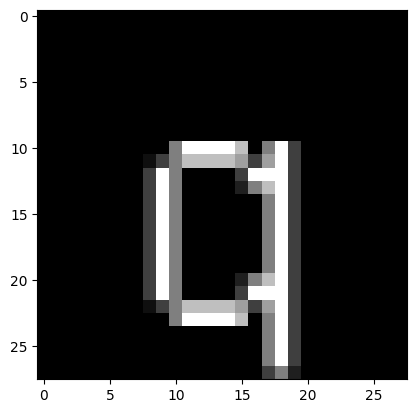

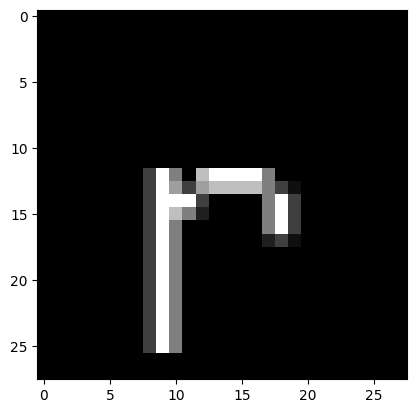

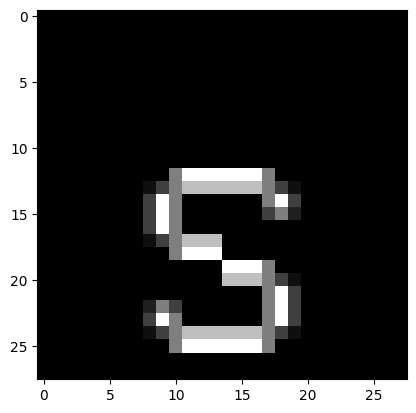

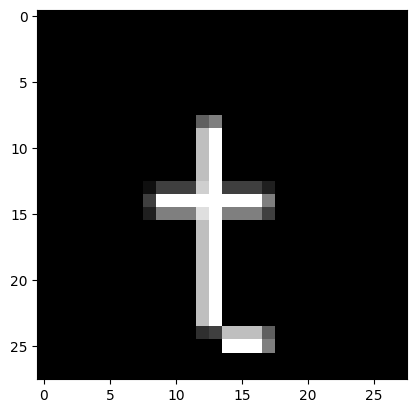

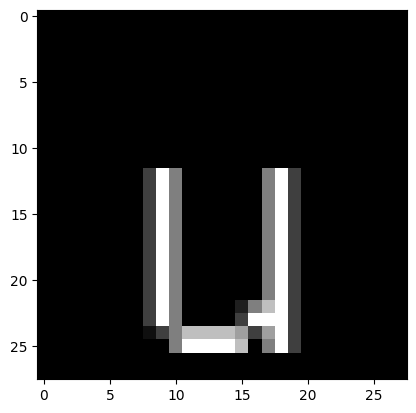

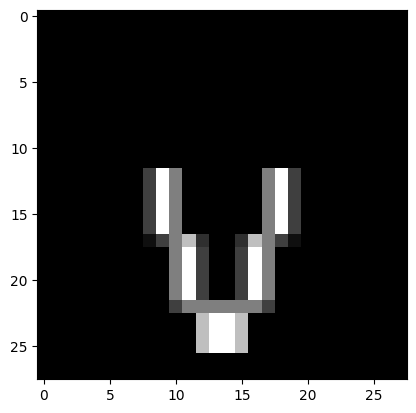

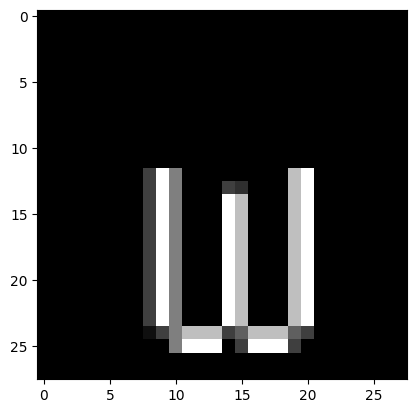

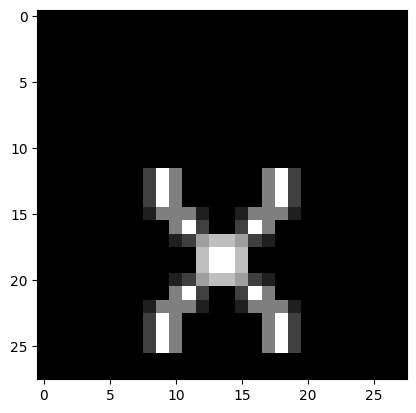

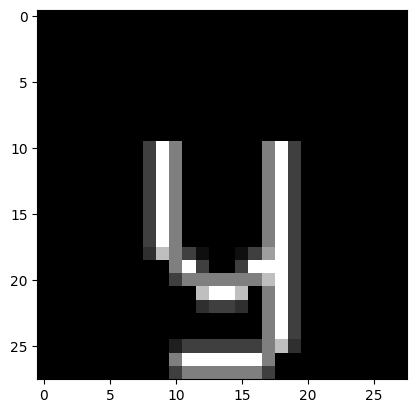

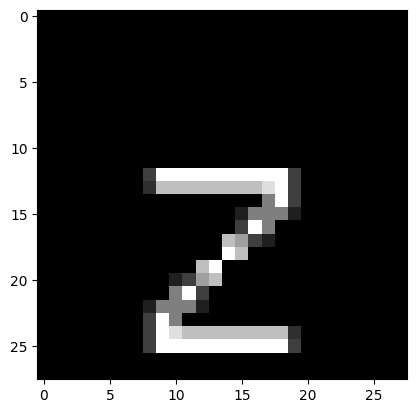

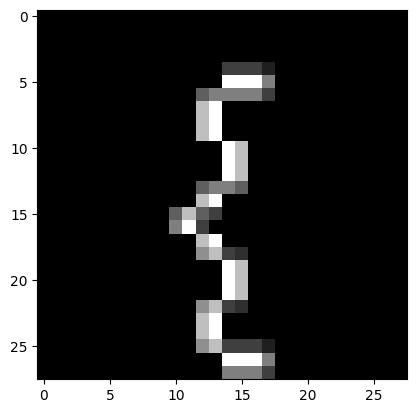

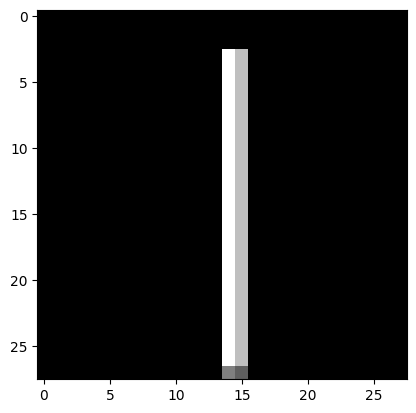

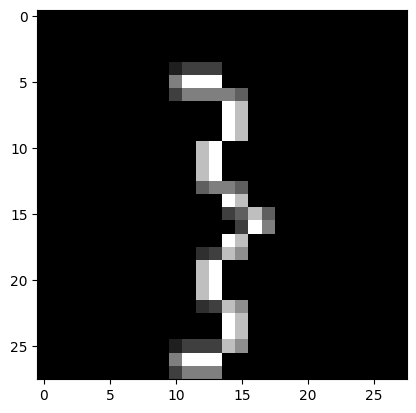

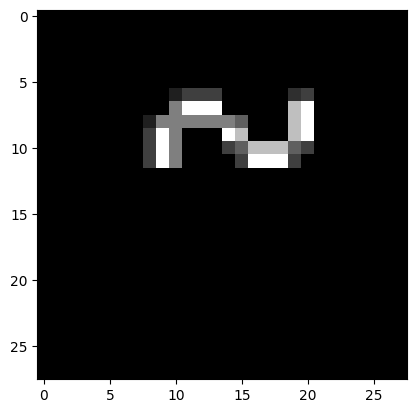

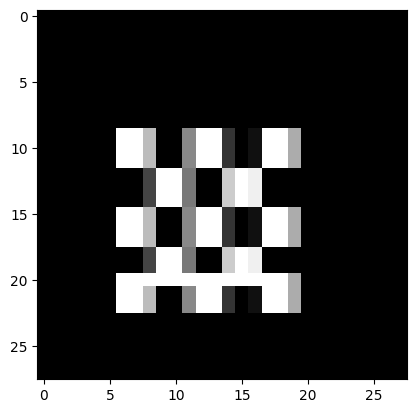

KeyboardInterrupt: 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from a .npy file
data = np.load("../Assets/Unicode_Data.npy", allow_pickle=True)

for item in data:
    if isinstance(item, np.ndarray):
        # If the item is a NumPy array, assume it's an image and display it
        plt.imshow(item.reshape(28,28), cmap='gray')
        plt.show()
    else:
        # For other elements (e.g., Unicode text), print them
        print(item)

In [11]:
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt

# Load the pre-trained model (replace 'your_model.h5' with the actual model file)
model = model_S

# Load the dataset from 'TrainingDataFinal.npy'
dataset = np.load('Unicode_Data.npy', allow_pickle=True)

# Define the output directories
output_dir = "./SavedImages"
class_dirs = [f"{output_dir}Class{i}/" for i in range(0, 11)]

# Create directories if they don't exist
for class_dir in class_dirs:
    os.makedirs(class_dir, exist_ok=True)

for index, data in enumerate(dataset):
    # Assuming the data contains image and label, replace with the actual structure
    image = data['image']  # Replace with the actual image field in your data
    label = data['label']  # Replace with the actual label field in your data

    # Classify the image using the model
    predicted_class = np.argmax(model.predict(image), axis=-1)

    # Ensure the predicted class is within the valid range
    if 0 <= predicted_class < len(class_dirs):
        class_dir = class_dirs[predicted_class]
        filename = os.path.join(class_dir, f"Image_{index:04d}.png")

        # Save the image to the appropriate class directory
        image = Image.fromarray(image)  # If your image is a numpy array, convert it to a PIL image
        image.save(filename, dpi=(300, 300))
        print(f"Classified Image {index} into Class {predicted_class}, saved as {filename}")


NameError: name 'model_S' is not defined